In [24]:
from pandas_datareader import data as pdr
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [3]:
# 데이터 불러오기
yf.pdr_override()

In [4]:
# 나스닥 지수 심볼 IXIC
nasdaq = pdr.get_data_yahoo('^IXIC', start='2022-01-01')
nasdaq.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,15722.910156,15777.429688,15643.940430,15644.969727,15644.969727,3379850000
2022-01-03,15732.500000,15832.799805,15644.089844,15832.799805,15832.799805,4412130000
2022-01-04,15852.139648,15852.139648,15512.410156,15622.719727,15622.719727,5109270000
2022-01-05,15547.160156,15586.299805,15095.179688,15100.169922,15100.169922,5011990000
2022-01-06,15024.150391,15198.450195,14914.870117,15080.860352,15080.860352,4774740000
2022-01-07,15095.719727,15171.019531,14877.629883,14935.900391,14935.900391,4229270000
2022-01-10,14751.780273,14953.849609,14530.230469,14942.830078,14942.830078,5303230000
2022-01-11,14919.259766,15158.709961,14837.629883,15153.450195,15153.450195,4378660000
2022-01-12,15263.099609,15319.030273,15117.290039,15188.389648,15188.389648,4321180000


In [5]:
# nasdaq Datatime 1971-02-05 ~ 2022-07-21
nasdaq.index

DatetimeIndex(['2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25'],
              dtype='datetime64[ns]', name='Date', length=141, freq=None)

In [6]:
# 시가 고가 저가 종가 
nasdaq.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

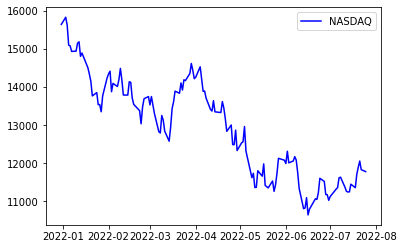

In [7]:
# 그래프 그리기
plt.plot(nasdaq.index, nasdaq.Close, 'b', label='NASDAQ')
plt.legend(loc='best')
plt.show()

### 일간 변동률

In [8]:
# 일간 변동률 (data percentage change)
nasdaq_dpc = (nasdaq['Close'] / nasdaq['Close'].shift(1)-1)*100
nasdaq_dpc.head(10)

Date
2021-12-31         NaN
2022-01-03    1.200578
2022-01-04   -1.326866
2022-01-05   -3.344807
2022-01-06   -0.127877
2022-01-07   -0.961218
2022-01-10    0.046396
2022-01-11    1.409506
2022-01-12    0.230571
2022-01-13   -2.512314
Name: Close, dtype: float64

In [9]:
# 첫 번째 데이터 NaN -> 0
nasdaq_dpc.iloc[0] = 0

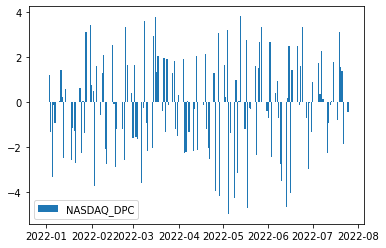

In [10]:
plt.bar(nasdaq_dpc.index,nasdaq_dpc, label='NASDAQ_DPC')
plt.legend(loc='best')
plt.show()

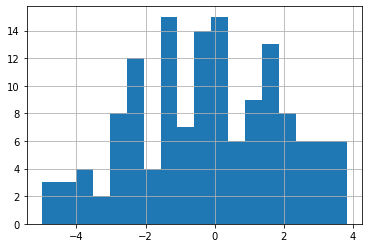

In [11]:
# 일간 변동률 분포 확인
# bins 는 x 축 구간 개수
plt.hist(nasdaq_dpc, bins=18)
plt.grid(True) # 격자 생성
plt.show()

In [12]:
# 일간 변동률 누적합 구하기
nasdaq_dpc_cs = nasdaq_dpc.cumsum()
nasdaq_dpc_cs[-1]

-25.222513135801563

## 나스닥 시간별 데이터 불러오기

### 1분 단위

In [13]:
#1분 단위
nasdaq = yf.download(tickers='^IXIC', period='7d', interval='1m')
nasdaq.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-15 09:30:00-04:00,11378.739258,11400.101562,11378.739258,11397.380859,11397.380859,0
2022-07-15 09:31:00-04:00,11392.058594,11392.345703,11382.930664,11382.930664,11382.930664,23004949
2022-07-15 09:32:00-04:00,11387.660156,11409.929688,11387.660156,11409.146484,11409.146484,21228773
2022-07-15 09:33:00-04:00,11411.965820,11411.965820,11395.879883,11395.879883,11395.879883,18136211
2022-07-15 09:34:00-04:00,11407.100586,11407.100586,11393.502930,11399.085938,11399.085938,21378584
2022-07-15 09:35:00-04:00,11398.468750,11416.366211,11398.468750,11416.366211,11416.366211,18740696
2022-07-15 09:36:00-04:00,11419.321289,11419.321289,11403.836914,11407.715820,11407.715820,19589868
2022-07-15 09:37:00-04:00,11406.991211,11410.742188,11403.515625,11403.579102,11403.579102,18991100
2022-07-15 09:38:00-04:00,11405.999023,11407.589844,11400.906250,11400.906250,11400.906250,16624182


In [14]:
start = datetime(2022, 7, 22, 9, 30, 0)
end = datetime(2022, 7, 22, 12, 31, 0)
nasdaq722 = nasdaq[start: end]
nasdaq722[1:]

/var/folders/f1/8sqqkq8j0dz3jtkx0lnjdy080000gn/T/ipykernel_5924/2759730534.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  nasdaq722 = nasdaq[start: end]


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-22 09:31:00-04:00,12030.266602,12034.800781,12023.542969,12024.520508,12024.520508,26283031
2022-07-22 09:32:00-04:00,12015.978516,12015.978516,11999.714844,12005.636719,12005.636719,29225294
2022-07-22 09:33:00-04:00,11999.943359,12015.262695,11999.943359,12012.970703,12012.970703,23992974
2022-07-22 09:34:00-04:00,12012.179688,12015.189453,12006.793945,12008.992188,12008.992188,20927553
2022-07-22 09:35:00-04:00,12000.588867,12001.713867,11994.034180,11998.818359,11998.818359,24755975
...,...,...,...,...,...,...
2022-07-22 12:27:00-04:00,11838.383789,11839.583984,11831.910156,11835.597656,11835.597656,7249000
2022-07-22 12:28:00-04:00,11841.809570,11850.523438,11841.809570,11850.523438,11850.523438,10275000
2022-07-22 12:29:00-04:00,11851.231445,11853.614258,11849.137695,11849.137695,11849.137695,7484000


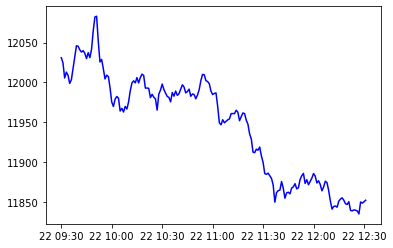

In [15]:
plt.plot(nasdaq722.index, nasdaq722['Close'], 'b', label='nasdaq722')

### 5분 단위

In [16]:
#5분 단위
nasdaq = yf.download(tickers='^IXIC', period='7d', interval='5m')
nasdaq.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-15 09:30:00-04:00,11378.739258,11411.965820,11378.739258,11399.085938,11399.085938,0
2022-07-15 09:35:00-04:00,11398.468750,11419.321289,11378.999023,11378.999023,11378.999023,91111901
2022-07-15 09:40:00-04:00,11383.869141,11383.869141,11364.001953,11372.920898,11372.920898,79915108
2022-07-15 09:45:00-04:00,11368.818359,11368.818359,11325.311523,11332.887695,11332.887695,76931787
2022-07-15 09:50:00-04:00,11333.325195,11336.779297,11299.155273,11303.365234,11303.365234,69570699


In [17]:
start = datetime(2022, 7, 22, 9, 30, 0)
end = datetime(2022, 7, 22, 12, 31, 0)
nasdaq722 = nasdaq[start: end]
nasdaq722.head(5)

/var/folders/f1/8sqqkq8j0dz3jtkx0lnjdy080000gn/T/ipykernel_5924/3884773329.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  nasdaq722 = nasdaq[start: end]


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-22 09:30:00-04:00,12026.138672,12034.800781,11999.714844,12008.992188,12008.992188,0
2022-07-22 09:35:00-04:00,12000.588867,12048.859375,11989.260742,12045.877930,12045.877930,105861967
2022-07-22 09:40:00-04:00,12048.524414,12054.207031,12032.867188,12036.447266,12036.447266,85006468
2022-07-22 09:45:00-04:00,12038.505859,12064.835938,12024.949219,12064.835938,12064.835938,81196522
2022-07-22 09:50:00-04:00,12063.350586,12091.910156,12024.449219,12028.790039,12028.790039,93561053


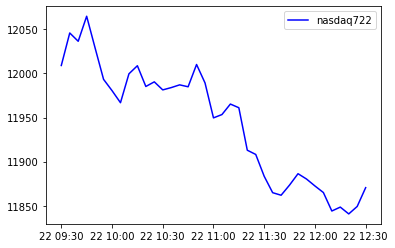

In [18]:
plt.plot(nasdaq722.index, nasdaq722['Close'], 'b', label='nasdaq722')
plt.legend(loc='best')

### 10분 단위

In [19]:
nasdaq722 = nasdaq722[0::2]
nasdaq722.head(10)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-22 09:30:00-04:00,12026.138672,12034.800781,11999.714844,12008.992188,12008.992188,0
2022-07-22 09:40:00-04:00,12048.524414,12054.207031,12032.867188,12036.447266,12036.447266,85006468
2022-07-22 09:50:00-04:00,12063.350586,12091.910156,12024.449219,12028.790039,12028.790039,93561053
2022-07-22 10:00:00-04:00,11991.435547,11992.774414,11966.625977,11980.500977,11980.500977,88399815
2022-07-22 10:10:00-04:00,11967.275391,12003.221680,11966.099609,11999.540039,11999.540039,63300632
2022-07-22 10:20:00-04:00,12008.080078,12008.080078,11981.084961,11985.193359,11985.193359,59141000
2022-07-22 10:30:00-04:00,11989.980469,12003.399414,11980.415039,11981.310547,11981.310547,51337000
2022-07-22 10:40:00-04:00,11983.631836,11999.302734,11977.608398,11987.026367,11987.026367,47606000
2022-07-22 10:50:00-04:00,11984.564453,12011.322266,11978.735352,12010.112305,12010.112305,43648000


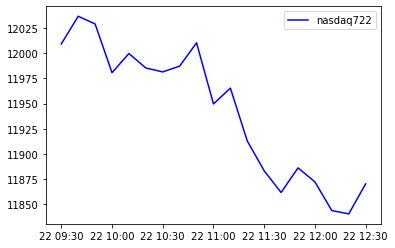

In [20]:
plt.plot(nasdaq722.index, nasdaq722['Close'], 'b', label='nasdaq722')
plt.legend(loc='best')

In [21]:
# 10분간 변동률 체크
# 분간 변동률 (minute percentage change)
nasdaq_mpc = (nasdaq722['Close'] / nasdaq722['Close'].shift(1)-1)*100
nasdaq_mpc.head(10)

Datetime
2022-07-22 09:30:00-04:00         NaN
2022-07-22 09:40:00-04:00    0.228621
2022-07-22 09:50:00-04:00   -0.063617
2022-07-22 10:00:00-04:00   -0.401446
2022-07-22 10:10:00-04:00    0.158917
2022-07-22 10:20:00-04:00   -0.119560
2022-07-22 10:30:00-04:00   -0.032397
2022-07-22 10:40:00-04:00    0.047706
2022-07-22 10:50:00-04:00    0.192591
2022-07-22 11:00:00-04:00   -0.503937
Name: Close, dtype: float64

(array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 2., 1., 2., 1., 1., 0., 1.,
        1., 2., 2.]),
 array([-0.50393732, -0.46616586, -0.4283944 , -0.39062294, -0.35285148,
        -0.31508002, -0.27730856, -0.23953711, -0.20176565, -0.16399419,
        -0.12622273, -0.08845127, -0.05067981, -0.01290836,  0.0248631 ,
         0.06263456,  0.10040602,  0.13817748,  0.17594894,  0.2137204 ,
         0.25149185]),
 <BarContainer object of 20 artists>)

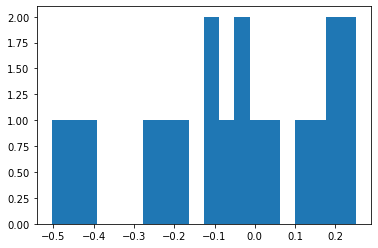

In [22]:
nasdaq_mpc[0] = 0
plt.hist(nasdaq_mpc, bins = 20)

### 엑셀 데이터 불러오기

In [31]:
nasdaq_0702 = pd.read_csv('./YfinanceData/nasdaq_2022-07-01.csv')
nasdaq_0702

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
0,2022-07-01 09:30:00-04:00,11013.884766,11019.094727,11012.394531,11019.053711,11019.053711,0.0
1,2022-07-01 09:31:00-04:00,11020.430664,11028.205078,11001.552734,11001.552734,11001.552734,27766287.0
2,2022-07-01 09:32:00-04:00,10998.352539,10998.352539,10988.350586,10988.350586,10988.350586,14381300.0
3,2022-07-01 09:33:00-04:00,11002.128906,11013.143555,10997.853516,11009.372070,11009.372070,35141796.0
4,2022-07-01 09:34:00-04:00,11002.797852,11002.797852,10979.359375,10986.404297,10986.404297,19670677.0
...,...,...,...,...,...,...,...
385,2022-07-01 15:55:00-04:00,11113.138672,11117.932617,11111.833984,11113.457031,11113.457031,22477000.0
386,2022-07-01 15:56:00-04:00,11115.080078,11119.216797,11114.087891,11114.211914,11114.211914,29307000.0
387,2022-07-01 15:57:00-04:00,11114.731445,11116.937500,11112.577148,11112.577148,11112.577148,24695000.0
388,2022-07-01 15:58:00-04:00,11115.313477,11123.803711,11115.313477,11120.148438,11120.148438,22465000.0
